In [1]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
X,y = fetch_openml('mnist_784', version=1, return_X_y=True)
y = y.astype(int)
X = X/255

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10000, random_state=42, shuffle=True)


In [63]:
import numpy as np
import pandas as pd
from sklearn.base import BaseEstimator
from scipy.stats import beta

class beta_NaiveBayes(BaseEstimator):
    
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
        self.alphas = [None] * 10
        self.betas = [None] * 10
        self.p_class = [None] * 10

        for c in range(10):
            x_class_n = self.X_train[self.y_train == c]

            means = np.mean(x_class_n, axis=0)
            variances = np.var(x_class_n, axis=0)           
            
            ks = ((means * (1 - means)) / variances) - 1
            alphas = ks * means
            betas = ks * (1 - means)

            n_y_class_c = len(self.y_train[self.y_train == c])

            p_class = n_y_class_c / len(self.y_train)

            self.alphas[c] = np.array(alphas)
            self.betas[c] = np.array(betas)
            self.p_class[c] = np.array(p_class)


    def predict(self, X):

        predict = np.array([])

        for index, row in X.iterrows():

            p = 0
            _class = None
            row = np.array(row)

            for c in range(10):

                alphas = self.alphas[c]
                betas = self.betas[c]
                p_class = self.p_class[c]
                
                betas_plus = beta.cdf(row+0.05, alphas, betas)
                betas_minus = beta.cdf(row-0.05, alphas, betas)
                beta_probs = betas_plus - betas_minus
                
                np.nan_to_num(beta_probs, copy=False, nan=1.0)
                p_temp = np.product(beta_probs) * p_class
                

                if p_temp >= p:
                    p = p_temp
                    _class = c
            
            predict = np.append(predict, _class)
        
        return predict




In [64]:
#Create a Naive Bayes Classifier
clf = beta_NaiveBayes() 

#Train the model using the training sets
clf.fit(X_train, y_train)

In [65]:
#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [66]:
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8399


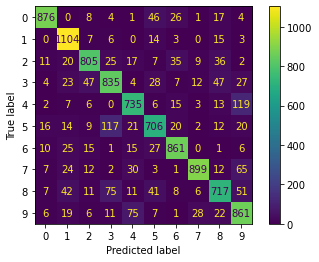

In [67]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred, labels=[x for x in range(10)])
display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[x for x in range(10)])
display.plot()